In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set(style="darkgrid")

In [35]:
df = pd.read_csv('netflix_titles.csv')


Display the first 5 rows of the dataset

In [36]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


High level of information about the dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Describe dataset to get statistical information summaries of the numeric columns

In [38]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Null values per column

In [39]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [40]:
#Dataset description
df_info = {
    'Number of rows': df.shape[0],
    'Number of Columns': df.shape[1],
    'Datatype': df.dtypes.to_dict(),
    'Unique values': df.nunique().to_dict()
}

df_info


{'Number of rows': 8807,
 'Number of Columns': 12,
 'Datatype': {'show_id': dtype('O'),
  'type': dtype('O'),
  'title': dtype('O'),
  'director': dtype('O'),
  'cast': dtype('O'),
  'country': dtype('O'),
  'date_added': dtype('O'),
  'release_year': dtype('int64'),
  'rating': dtype('O'),
  'duration': dtype('O'),
  'listed_in': dtype('O'),
  'description': dtype('O')},
 'Unique values': {'show_id': 8807,
  'type': 2,
  'title': 8807,
  'director': 4528,
  'cast': 7692,
  'country': 748,
  'date_added': 1767,
  'release_year': 74,
  'rating': 17,
  'duration': 220,
  'listed_in': 514,
  'description': 8775}}

/var/folders/lm/0_g9hsjn3k75qytqhw5s617w0000gn/T/ipykernel_40456/3474959141.py:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='type', data=df, hue = 'type', palette=custom_colors, legend=False)


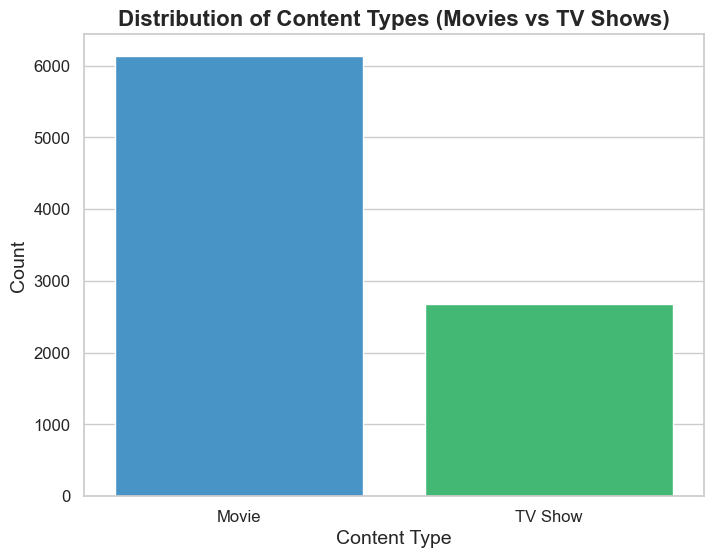

In [44]:
# Set seaborn style for more appealing graphics
sns.set(style="whitegrid", palette="muted")

# Custom colors
custom_colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

# Distribution of 'type' column (Movie vs TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, hue = 'type', palette=custom_colors, legend=False)
plt.title('Distribution of Content Types (Movies vs TV Shows)', fontsize=16, fontweight='bold')
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



/var/folders/lm/0_g9hsjn3k75qytqhw5s617w0000gn/T/ipykernel_40456/3888694035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette=custom_colors)


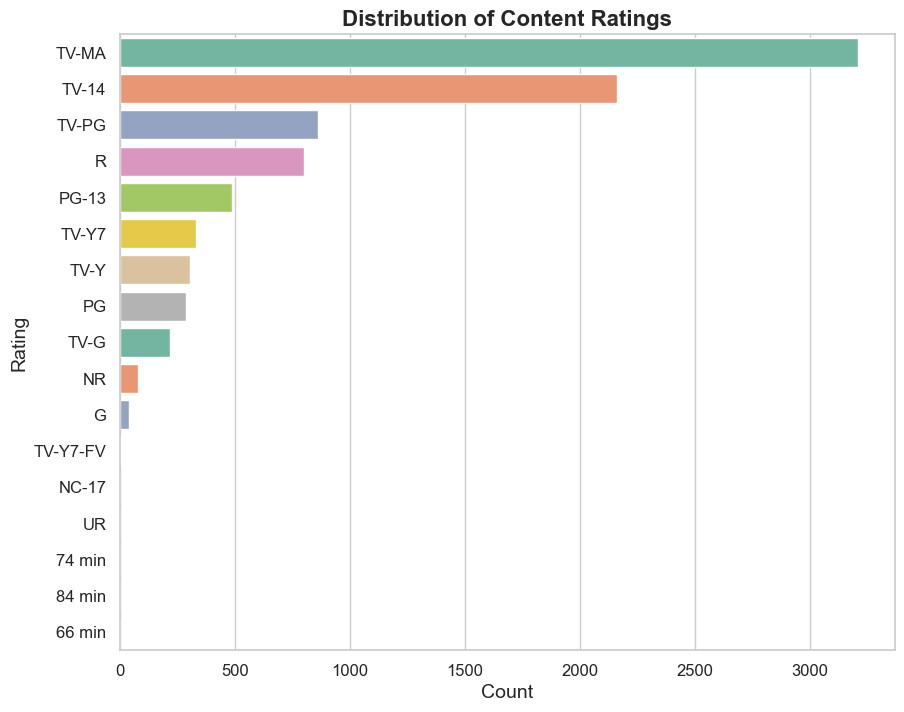

In [50]:

# Custom colors expanded for more categories
custom_colors = sns.color_palette("Set2", 17)  # Using a Seaborn palette with enough colors

# Distribution of 'rating' column
plt.figure(figsize=(10, 8))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette=custom_colors)
plt.title('Distribution of Content Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/lm/0_g9hsjn3k75qytqhw5s617w0000gn/T/ipykernel_40456/609542428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df, order=df['country'].value_counts().index[:10], palette=custom_colors)


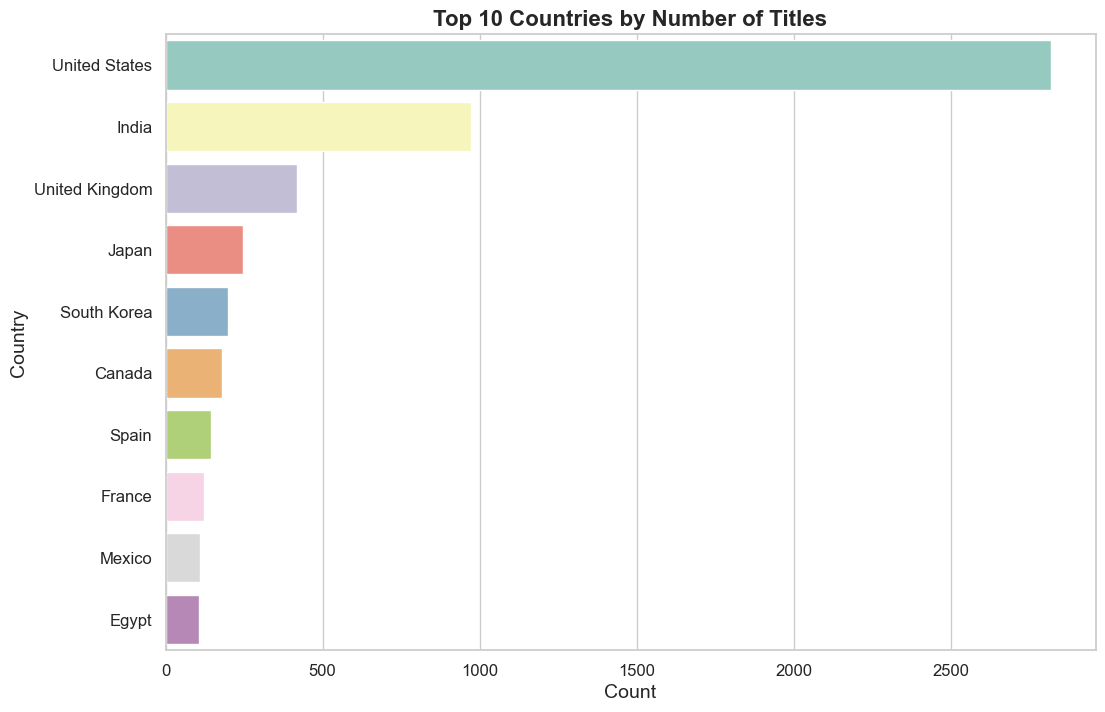

In [56]:
# Custom colors for exactly 10 categories
custom_colors = sns.color_palette("Set3", 10)
# Distribution of 'country' column (Top 10 most common countries)
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index[:10], palette=custom_colors)
plt.title('Top 10 Countries by Number of Titles', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()